# Project03. 딥러닝 프로젝트

## 과정 개요
* Boston 주택 가격 예측 모델
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.

* Reuters 딥러닝 모델
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

* CIFAR10 딥러닝 모델
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

## 학습 목표
* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습한다.
* Reuters 데이터셋을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습한다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습한다.

## Boston 주택 가격 예측 모델

* 보스턴 시의 주택 가격에 대한 데이터셋
* 주택의 여러 요건들과 가격 정보가 포함
* 회귀 분석에 자주 사용되는 대표적인 데이터셋

* 예측해야 하는 target은 주택가격
* 여러 가지 feature들이 존재하는데, feature들의 값의 범위가 제각각이다.
* 데이터셋의 feature에 대한 설명
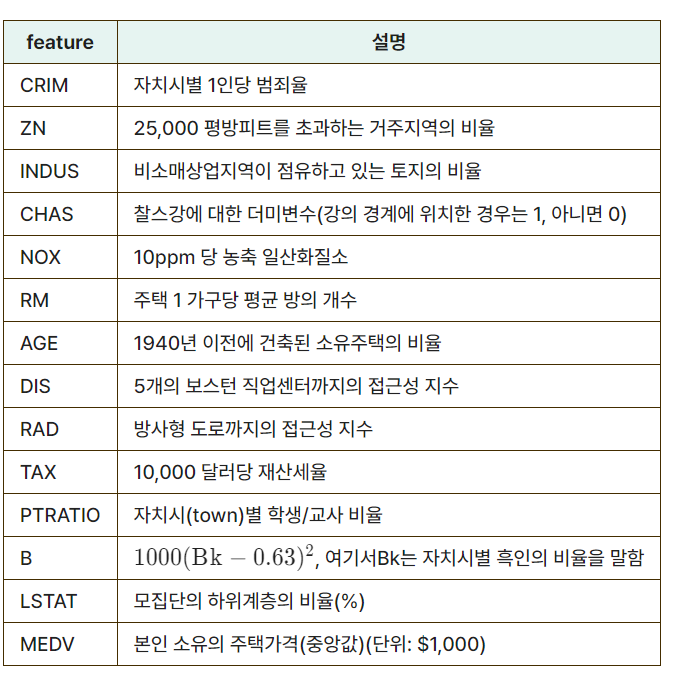

### 데이터 전처리
* 값의 범위가 다르면 제대로 학습시키기 어려움
* 표준화(Standardization) - 다양한 feuture들의 다양한 값의 범위를 표준화를 통해서 일관성 있게 만든다.
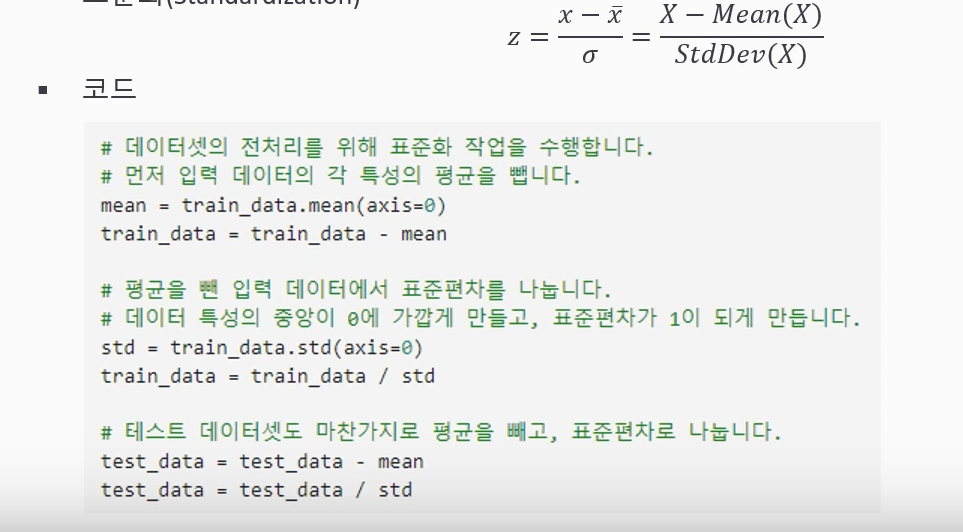
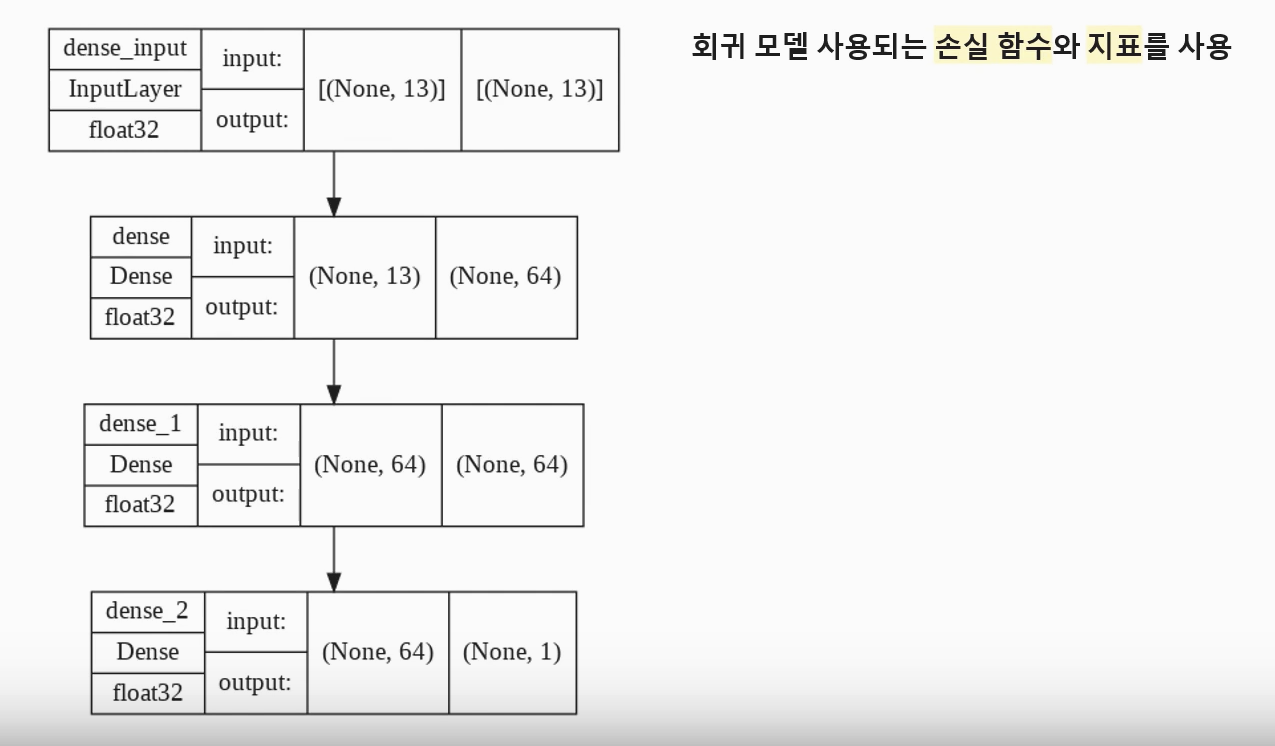
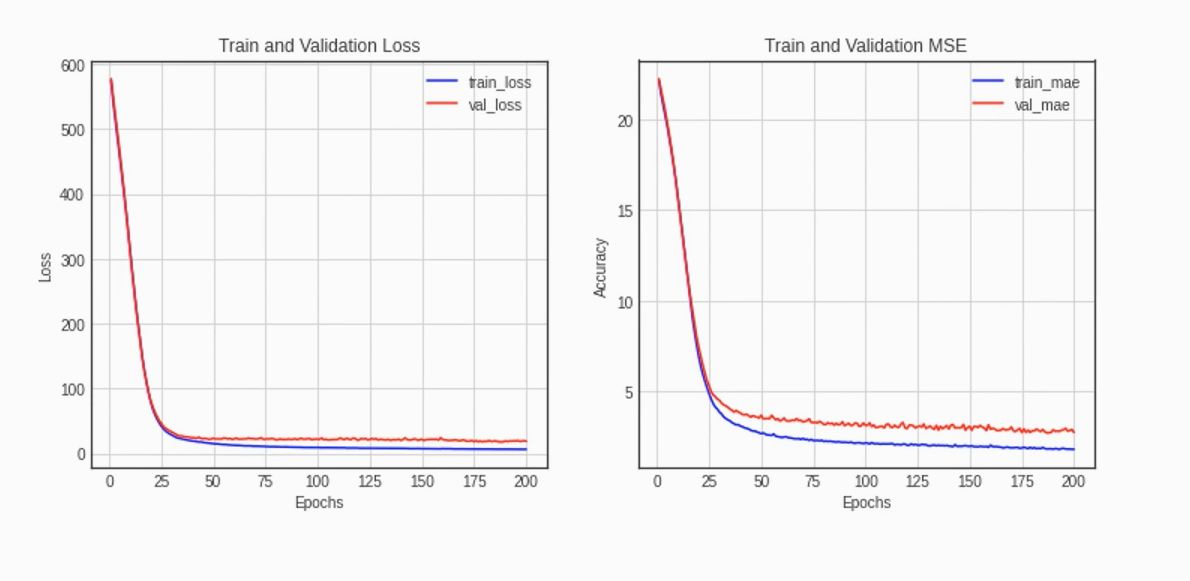

### 데이터 로드 및 전처리
* 먼저 데이터를 불러와 확인해 보고 전처리를 해 보자
* 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [13]:
# keras.datasets 안에 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기 확인
print(len(train_data)) # len() 함수를 사용하면 해당 데이터 구조의 요소 개수를 반환 - train_data가 2차원 배열이기 때문에 행의 개수를 나타낸다.
print(len(test_data))

404
102


In [14]:
# 데이터 형상을 확인
train_data.shape

(404, 13)

In [15]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [16]:
# 데이터셋의 전처리를 위해 표준화 작업을 수행
# 먼저 입력 데이터의 각 특성의 평균을 뺀다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력데이터에서 표준 편차를 나눈다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만든다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눈다.
test_data = test_data - mean
test_data = test_data / std

**데이터셋 처리 과정을 간단하게 이해해보자**
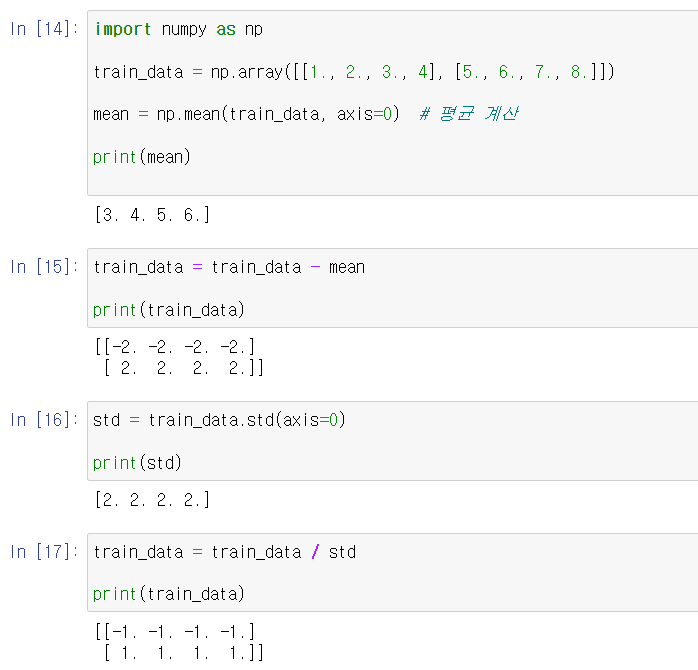

In [17]:
# 처리된 데이터를 확인
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

### 모델 구성 및 컴파일
* 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일한다. 
* Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성

In [18]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1)) # 회귀 예측이기 때문에 값은 하나이고, 그대로 출력되면 되기 때문에, 따로 활성화 함수를 적용하지 않음.
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'] )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [19]:
history = model.fit(train_data, train_labels, batch_size=10, validation_split=0.2, epochs=10)

Epoch 1/10
33/33 [==============================] - 1s 7ms/step - loss: 481.0513 - mae: 19.8401 - val_loss: 429.4674 - val_mae: 18.5355
Epoch 2/10
33/33 [==============================] - 0s 3ms/step - loss: 218.8836 - mae: 12.1121 - val_loss: 120.2238 - val_mae: 8.0128
Epoch 3/10
33/33 [==============================] - 0s 3ms/step - loss: 62.7101 - mae: 5.6991 - val_loss: 52.9687 - val_mae: 5.3079
Epoch 4/10
33/33 [==============================] - 0s 3ms/step - loss: 35.7525 - mae: 4.2458 - val_loss: 31.8085 - val_mae: 4.1197
Epoch 5/10
33/33 [==============================] - 0s 3ms/step - loss: 25.9929 - mae: 3.5115 - val_loss: 24.2469 - val_mae: 3.6183
Epoch 6/10
33/33 [==============================] - 0s 3ms/step - loss: 21.3723 - mae: 3.1505 - val_loss: 21.4292 - val_mae: 3.4677
Epoch 7/10
33/33 [==============================] - 0s 3ms/step - loss: 19.0231 - mae: 3.0140 - val_loss: 17.6056 - val_mae: 3.1751
Epoch 8/10
33/33 [==============================] - 0s 3ms/step - los

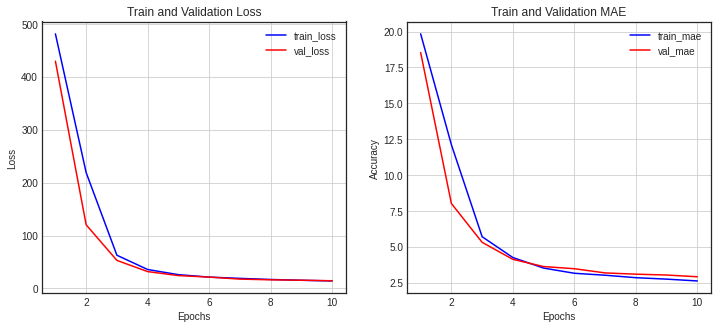

In [24]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여준다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
# 테스트 데이터셋을 이용해 모델을 평가
mse, mae= model.evaluate(test_data, test_labels)
print(f'test_mse: {mse}')
print(f'test_mae: {mae}')

4/4 [==============================] - 0s 2ms/step - loss: 22.1765 - mae: 3.3238
test_mse: 22.176469802856445
test_mae: 3.3238184452056885


* 데이터셋의 수가 많지 않기 때문에 모델의 복잡도를 줄였다.
* 테이터셋의 수가 많지 않아, 과적합이 발생하지 않게 epoch 수를 크게 넣지 않았다.
* 오차가 적을수록 모델의 성능이 좋은 것이기 때문에, 오차 수치는 나쁘지 않아 보인다.
* 데이터 전처리를 하는 과정에서 계산 과정이 나와서 이해가 쉽지 않았다. 데이터 형상에 맞춰서 어떤 식으로 계산이 되는지 궁금해서 간단하게 구현해본 후 이해할 수 있었다. 하지만 좀 더 표준편차에 대한 개념을 익히고 싶다.
* accuracy를 지표로 사용할 경우는 직관적으로 잘 와닿았는데, mae를 사용하는 것은 아직 크게 와닿지는 않는다.. 오차가 적으면 좋은 것이라고 생각하면 되는 걸까?
    * 분류에서 지표로 accuracy를 사용하는 이유: 정확도'는 분류 문제에서 예측이 정확하게 맞은 비율을 나타내는 지표이며, 클래스 라벨을 예측하는 문제에서 사용
    * 회귀에서 지표로 mse나 mae를 사용하는 이유: 회귀 문제에서는 연속적인 값을 예측하는 문제이기 때문에 클래스를 정확하게 맞추는 것이 아니라 예측값과 실제값 간의 차이를 최소화하는 것이 목표에 가깝기 때문이다.